# Day1 - Afternoon - More *nix

_Note: this is a static notebook (ie. not interactive). All exercises and commands in this session will be performed directly in a terminal window.  To launch a new terminal, click on `Terminal>New`._

## Bash (shell) scripting

* manage complex workflows more easily
* work on a cluster
    - distribute multiple similar jobs
    - good responsible coding practice
* beginning of reproducible research

### A simple command

```
$ echo 'Hello, world!'
```

### Let's make it a script
To make this command into a reuseable script, we just need to put it into a file. Let's create a file `hiscript.sh` and put this command inside. (.sh is conventionally used to denote bash script files)

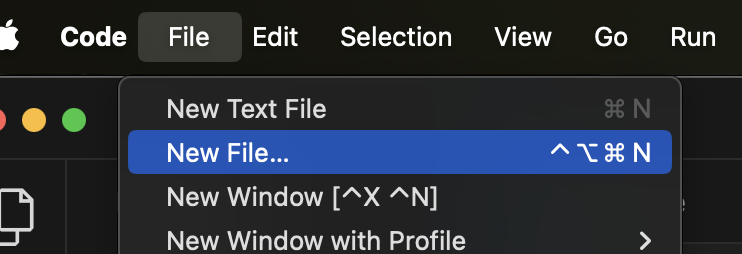

Once we've created this new file, we can save it and run the script by calling it directly as so.

The first thing we do is add a 'shebang' line to the top of the file. This tells the system what interpreter to use to run the script. In this case, we're using bash. It could also be  perl or python, or many other interpreters.

```
#!/bin/bash

echo 'Hello, world'
```

To run our file, we can just give the file to the bash interpreter as:
```
$ bash ./hiscript.sh
``` 

### Permissions
Lets take a look again at the files in our directory

In [ ]:
%%bash
ls -lh

The first set of characters in each returned line details the permissions of the file. The permissions are assigned based on three different 'levels' of users, and there are three types of permissions:

<img src="images/linux-permissions-2021-12-1004.png" alt="Permissions Illustration" style="width: 500px;"/>

Specific permissions on a given file are added or removed for each 'level' using `chmod`

```
$ touch testfile  #creates an empty file named testfile
$ ls -l testfile   #what are the default permissions?
$ chmod +x testfile ##sets the execute bit for owner, group and world.
```

You can also add bits by instead using the binary value for each of the levels. For example, to add read, write, and execute permissions for the owner, and read and execute permissions for the group and world, you would use the following command:

```
$ chmod 755 testfile ##sets rwx permissions for owner, r-x for group and world.
```

7 is the binary value for 111, 5 is the binary value for 101, and 0 is the binary value for 000.

So - on our existing `hiscript.sh` file - we can change permissions to make it executable:

```
$ chmod a+x hiscript.sh
```

And now we can run the file directly as an executable program.

```
$ ./hiscript.sh
```

## Variables

Variables in bash are defined by assigning a value to a name. The name of the variable must start with a letter, and can contain letters, numbers, and underscores. The value is assigned using the `=` operator, with no spaces around the `=` sign.

type (or copy&paste, I'm not your dad) the following into a new file called `variables.sh`:

```
#!/bin/bash

echo "x=$x"
x=1   # when assigning shell variables you
      # cannot leave any spaces around the = sign
echo "x=$x"
y=2
echo "y=$y"
y=$x
echo "y=$y"
```
Make this an executable file and run it.


## Conditionals

if-then-else statements are very useful, when you want to execute code only if some condition is met. ‘fi’ terminates the if statement.

```
VAR=2
if [ $VAR -gt 5 ] ; then
    echo "VAR > 5"
else
    echo "VAR <= 5"
fi
```

additional “else” statements can be added, using elif:

```
VAR=2
if [ $VAR -gt 5 ] ; then
    echo "VAR > 5"
elif [ $VAR -lt 0 ]; then
    echo "VAR < 0"
else
    echo "0 <= VAR <= 5"
fi
```

## Scripts taking input from user

Let's say we want our script to take input from the user as it runs. We can do this by using the `read` command.

```
#!/bin/bash
echo "this script takes input from the terminal."
echo "type an integer between 1 and 10:"
read MYNUM
echo "you typed $MYNUM"
```

## Conditional arguments

You can also pass in conditional `arguments` to your bash script, also known as flags.

Here's an example

```
#!/bin/bash

echo "the first argument is $1."
echo "the second argument is $2."
echo "the number of arguments is $#."
echo "the name of the program is $0."
echo "\$@ is a variable with all arguments: $@"


$ ./args.sh argument1 arg2 another argument
```

What's the output of this?


## Looping

Let's say I wanted to know how many genes are annotated on chromosome 19 in the file, hg38genes.txt. How would I do that?

You could use this command:
`$ grep chr19 data/hg38genes.txt | wc -l`


### for loops

Now lets get the number of genes on chromosomes 11, 12, 13, and 14. We could do each separately but that’s more typing and risks mistakes.

Let’s write a script for this called `countgenes.sh`

```

#!/bin/bash

for i in chr11 chr12 chr13 chr14
do
   echo $i
   grep $i hg38genes.txt | wc -l
done
```

We could also script it to loop through all 22 chromsome numbers, as:

```
for i in {1..22}
do
    echo chr$i
    grep chr$i hg38genes.txt | wc -l
    done
```

Exercise:



Create a bash script that takes two arguments: a string, and an integer. The output of the script should be to repeat the input string as many times as indicated by the second argument (integer).

## While loops

`while` will continue executing the code in the loop as long as its condition is true:

```
VAR=1
while [ $VAR -lt 5 ]
do
    echo "VAR=$VAR"
    VAR=$[ VAR+1 ]
done
```

NOTE that the test evaluation  `[`  is actually a program! so you need spaces before and after the square bracket. Possible tests for integers include -eq, -lt, -gt, -le, -ge. Strings can be compared with = and != . Lots of other tests are possible.


Be careful: it’s easy to write a while loop that never finishes. Remember control-c will kill a running/runaway process.

example of while loop that never terminates:

```
VAR=1
while [ $VAR -lt 5 ]
do
    echo "VAR=$VAR"
done
```

## Reading file(s)/lines
When you are working on bash scripts, sometimes you may need to read a file line by line.

```
#!/bin/bash

file='data/authors.txt'
n=1
while read line; do
    echo "Line $n : $line"
    n=$((n+1))
done < $file
```


Let's deconstruct what's actually happening in this script.

1. We're setting the variable `file` to the path of the file we want to read.
2. We're setting the variable `n` to 1, which we'll use to keep track of the line number.
3. We're using a `while` loop to read each line of the file. The `read` command reads a line from the file and assigns it to the variable `line`.
4. We're echoing the line number and the line itself.
5. We're incrementing the line number by 1.
6. We're redirecting the input of the `while` loop to the file we want to read.


## cut | sort | uniq

### `cut` - remove sections from each line of files
cut can grab columns of data from a delimited (in this case tab-delimited) 
Columns are specified by the -f flag

In [ ]:
%%bash

# just doing the first 10 lines by piping the output to head
cut -f1 knownGene.txt | head

In [ ]:
%%bash

cut -f2,3 data/hg38genes.txt | head


### sort - sort or merge records (lines) of text and binary files
We can combine the power of `cut` with another command-line tool, `sort` by using the pipe (`|`) operator.

```
# sort all chromosomes
$ cut -f1 data/hg38genes.txt | sort 


```
^ What happened here? let's `man sort` to see if we can figure out a solution.


In [ ]:
%%bash

# sort all chromosomes
cut -f1 data/hg38genes.txt | sort


In [ ]:
%%bash
# sort all start positions
cut -f2 data/hg38genes.txt | sort

### `uniq` - report or filter out repeated lines in a file
As it's name implies, `uniq` will take the input provided and collapse it to the unique set of rows.
When combined with `cut` and `sort` this can be a very handy set of tools for summarizing tabular data in files.

In [ ]:
%%bash 
#Find unique chromosome names
cut -f1 data/hg38genes.txt | sort | uniq


What if we added the argument `-c` to `uniq`? (hint: `man uniq` for answer)


#### Exercises:
Using the combination of `cut | sort | uniq`, find:

1. How many genes are on each strand ('+', '-') in the file hg38genes.txt?

2. How many genes are on each strand, for each chromosome?

3. Write a script that accepts terminal input and that will count the number of genes on the chromosome specified. The input should be only numerical, so your program will need to prepend the string chr. Be sure to use the -w option with grep so that chr1 really does only retrieve chr1 and not chr10, chr11 etc.


## awk
awk is an incredibly powerful unix utility for manipulating data/files!

```
$ awk '{print $1}' data/hg38genes.txt  # assumes tab/space delimited columns
$ awk '{if ($1=="chr2") print $5}' data/hg38genes.txt

$ awk '{print $2,$3}' data/hg38genes.txt # you can print out multiple columns
$ awk '{print $3-$2}' data/hg38genes.txt # even perform operations on different columns


$ awk '{if ($5 ~ /MIR/) print}' data/hg38genes.txt 
$ awk '{if ($5 ~ /MIR/ && $1!="chr3") print}' data/hg38genes.txt
```

## sed
The unix string editor, is also a very useful tool. There are many modes but one of the most useful works like find/replace, where the pattern to find is given first followed by the substitution.

```
$ sed -e s/chr/CHR/ data/hg38genes.txt
```

This will find the first occurrence of chr in each line and substitute it with CHR. To substitute all occurrences, specify ‘global’: 

```
$ sed -e s/chr/CHR/g data/hg38genes.txt
```


## Review
Let's stop here for the day:

- Review outstanding questions/comments
- Review of any particular questions
- Homework quiz/problem set